<u>Классификация музыкальных жанров</u>

![](https://drive.google.com/uc?export=view&id=1oxjiju7OXlaWISbVY_Cv08NrJjAssl1y)

Датасет содержит различные характеристики музыкальных треков. Необходимо решить задачу классификации - предсказать жанр трека по представленным признакам.

Датасет содержит 17996 строк и 17 столбцов.

Целевой признак - музыкальный жанр Class:

**Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Country, Instrumental**.

Описание признаков:

| Поз. |  Имя признака | Описание |
| :-: | :-: | :- |
| 1. | **Artist name** | имя исполнителя | 
| 2. | **Track name** | название трека |
| 3. | **Popularity** | популярность, числовой признак, от 1 до 100 |
| 4. | **danceability** | танцевальность трека, от 0 до 1 |
| 5. | **energy** | энергичность трека, от 0 до 1 |
| 6. | **key** | тональность, категориальный |
| 7. | **loudness** | громкость, числовой признак, принимает как отрицательные, так и положительные значения |
| 8. | **mode** | бинарный признак, сложно восстановить исходное значение |
| 9. | **speechiness** | то, насколько понятна слушателю речь в треке, числовой признак |
| 10. | **acousticness** | отражает использование акустических инструментов, числовой признак |
| 11. | **instrumentalness** | отражает использование музыкальных инструментов в треке, числовой признак |
| 12. | **liveness** | вероятность того, что трек исполнялся вживую,  числовой признак, от 0 до 1 |
| 13. | **valence** | позитивность трека, от 0 до 1 |
| 14. | **tempo** | темп, принимает числовое значения больше 0 |
| 15. | **duration_in min/ms** | продолжительность трека в миллисекундах, числовой признак |
| 16. | **time_signature** | размер такта, категориальный |
| 17. | **Class** | целевая переменная, жанр музыки |

## **1. Загрузка и подготовка данных**

Импортируем библиотеки для работы с данными:

---



In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

Подготавливаем общие настройки для графиков:

---


In [2]:
sns.set(
    rc = {
        "figure.figsize": (10, 6), #размер графика - 12 дюймов в ширину, 8 в длину
        "axes.titlesize": 20, #размер заголовка 
        "axes.labelsize": 14, #размер подписей осей
        "xtick.labelsize": 13, #размер подписей чёрточек на x-оси
        "ytick.labelsize": 13, #размер подписей чёрточек на y-оси
    }
)

sns.set_style("whitegrid") #тема фона, белая со штриховкой

Импортируем датасет:

---

In [3]:
df=pd.read_csv('./train.csv',sep=',')

In [4]:
df.head(3)

Artist Name                             Track Name  Popularity  \
0     Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1         Boston                           Hitch a Ride        54.0   
2  The Raincoats                     No Side to Fall In        35.0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564  1.0    -4.964     1       0.0485        0.0171   
1         0.382   0.814  3.0    -7.230     1       0.0406        0.0011   
2         0.434   0.614  6.0    -8.334     1       0.0525        0.4860   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849    0.899  134.071            234596.0   
1          0.004010    0.1010    0.569  116.454            251733.0   
2          0.000196    0.3940    0.787  147.681            109667.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6

In [5]:
df.shape

(17996, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [7]:
df.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

Заменим объектный тип на специальный категориальный:

---

In [8]:
df['Artist Name'] = df['Artist Name'].astype('category')
df['Track Name'] = df['Track Name'].astype('category')

In [9]:
df.describe(include=['category'])

Artist Name Track Name
count             17996      17996
unique             9149      15129
top     Backstreet Boys     Dreams
freq                 69          9

Удалим столбецы Artist Name и Track Name из-за большого количества уникальных значений и предположительно малого влияния на результат предсказания класса

In [10]:
df=df.drop(columns='Artist Name')
df=df.drop(columns='Track Name')

Посмотрим имена признаков:

---

In [11]:
df.columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

Посмотрим количество пустых значений по столбцам:

---

In [12]:
df.isnull().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Создадим списки из категориальных и числовых признаков:

---

In [13]:
num_cols=[
    'Popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_in min/ms'

]
cat_cols=[
    'mode',
    'key',
    'time_signature'
]

In [14]:
feature_cols = num_cols + cat_cols

Заменим пропуски медианой

---

In [15]:
df["key"] = df['key'].fillna(df['key'].median(axis = 0), axis = 0)

In [16]:
df["Popularity"] = df['Popularity'].fillna(df['Popularity'].median(axis = 0), axis = 0)

In [17]:
df["instrumentalness"] = df['instrumentalness'].fillna(df['instrumentalness'].median(axis = 0), axis = 0)

In [18]:
df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

Заменим тип данных категориальных признаков на category:

---

In [19]:
df['key']=df['key'].astype('int64')
df[cat_cols]=df[cat_cols].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Popularity          17996 non-null  float64 
 1   danceability        17996 non-null  float64 
 2   energy              17996 non-null  float64 
 3   key                 17996 non-null  category
 4   loudness            17996 non-null  float64 
 5   mode                17996 non-null  category
 6   speechiness         17996 non-null  float64 
 7   acousticness        17996 non-null  float64 
 8   instrumentalness    17996 non-null  float64 
 9   liveness            17996 non-null  float64 
 10  valence             17996 non-null  float64 
 11  tempo               17996 non-null  float64 
 12  duration_in min/ms  17996 non-null  float64 
 13  time_signature      17996 non-null  category
 14  Class               17996 non-null  int64   
dtypes: category(3), float64(11), int64(1

In [21]:
df.describe(include=['category'])

key   mode  time_signature
count   17996  17996           17996
unique     11      2               4
top         6      1               4
freq     3204  11459           16451

## **2. Визуализация данных**

Распределение по классам:

---

In [22]:
i_mass =[]
per_mass = []
for i in range (11):
    count_no_class = len(df[df['Class']!=i])
    count_class = len(df[df['Class']==i])
    pct = count_class/(count_no_class + count_class)
    print(i, pct*100)
    i_mass.append (i)
    per_mass.append (pct*100)

0 3.4729939986663703
1 7.6294732162702825
2 7.068237386085798
3 2.2338297399422093
4 2.1504778839742165
5 8.04067570571238
6 14.37541675927984
7 3.200711269170927
8 10.302289397643921
9 14.02533896421427
10 27.500555679039785


Распределение по классам с названиями жанров:

---


In [23]:
class_name = ["Rock", "Indie", "Alt", "Pop", "Metal", "HipHop", "Alt_Music", "Blues", "Acoustic/Folk", "Instrumental", "Country", "Bollywood"]
class_number = []
class_number = df['Class']
class_mapping = { i : class_name[i] for i in range(0,11)} #Class mapping
class_number = class_number.map(class_mapping)
class_number.value_counts()

Country          4949
Alt_Music        2587
Instrumental     2524
Acoustic/Folk    1854
HipHop           1447
Indie            1373
Alt              1272
Rock              625
Blues             576
Pop               402
Metal             387
Name: Class, dtype: int64

Визуализация распределения по классам:

---

<AxesSubplot:>

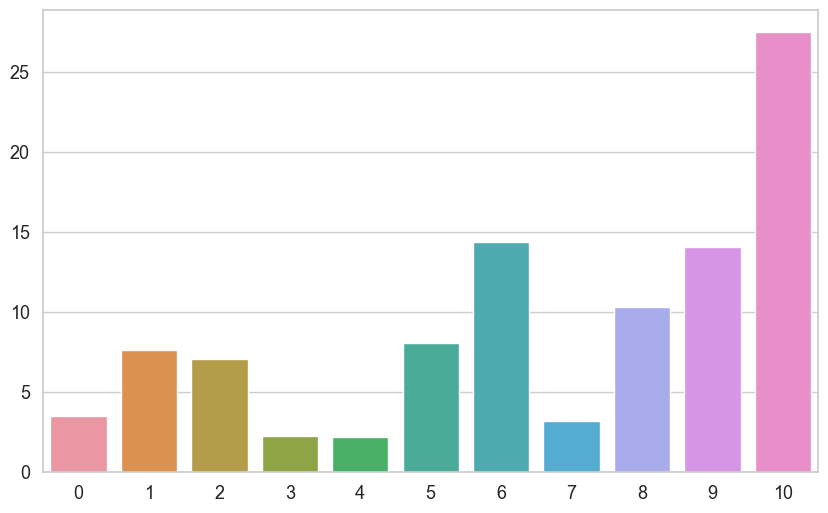

In [24]:
sns.barplot(i_mass, per_mass)

([<matplotlib.patches.Wedge at 0x20aef8029d0>,
 [Text(0.714378271028979, 0.8364590162594021, '10'),
  Text(-0.6290100411264601, 0.902411418457285, '6'),
  Text(-1.0973192628988189, 0.07674917114336272, '9'),
  Text(-0.8452489824464342, -0.7039560765227245, '8'),
  Text(-0.3251655259895507, -1.0508412728418783, '5'),
  Text(0.21012447371775286, -1.0797442778476938, '1'),
  Text(0.6691550578141721, -0.8730587085653015, '2'),
  Text(0.9166651188154034, -0.6080502116989539, '0'),
  Text(1.0231438818649357, -0.4039512309702136, '7'),
  Text(1.0769006837341026, -0.2242429873441358, '3'),
  Text(1.0974906173793233, -0.07425863427475475, '4')],
 [Text(0.3896608751067158, 0.45625037250512834, '27.5%'),
  Text(-0.3430963860689782, 0.49222441006761, '14.4%'),
  Text(-0.598537779762992, 0.04186318426001603, '14.0%'),
  Text(-0.46104489951623673, -0.3839760417396679, '10.3%'),
  Text(-0.17736301417611855, -0.5731861488228427, '8.0%'),
  Text(0.11461334930059244, -0.5889514242805601, '7.6%'),
  Text

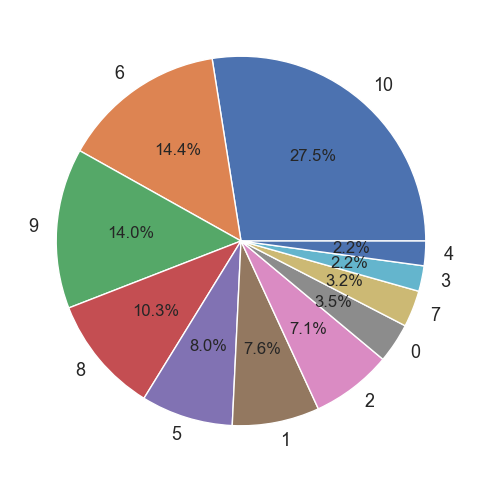

In [25]:
plt.pie(df['Class'].value_counts(), labels = df['Class'].value_counts().index, autopct = '%1.1f%%')

Посмотрим зависимости от признаков:

---

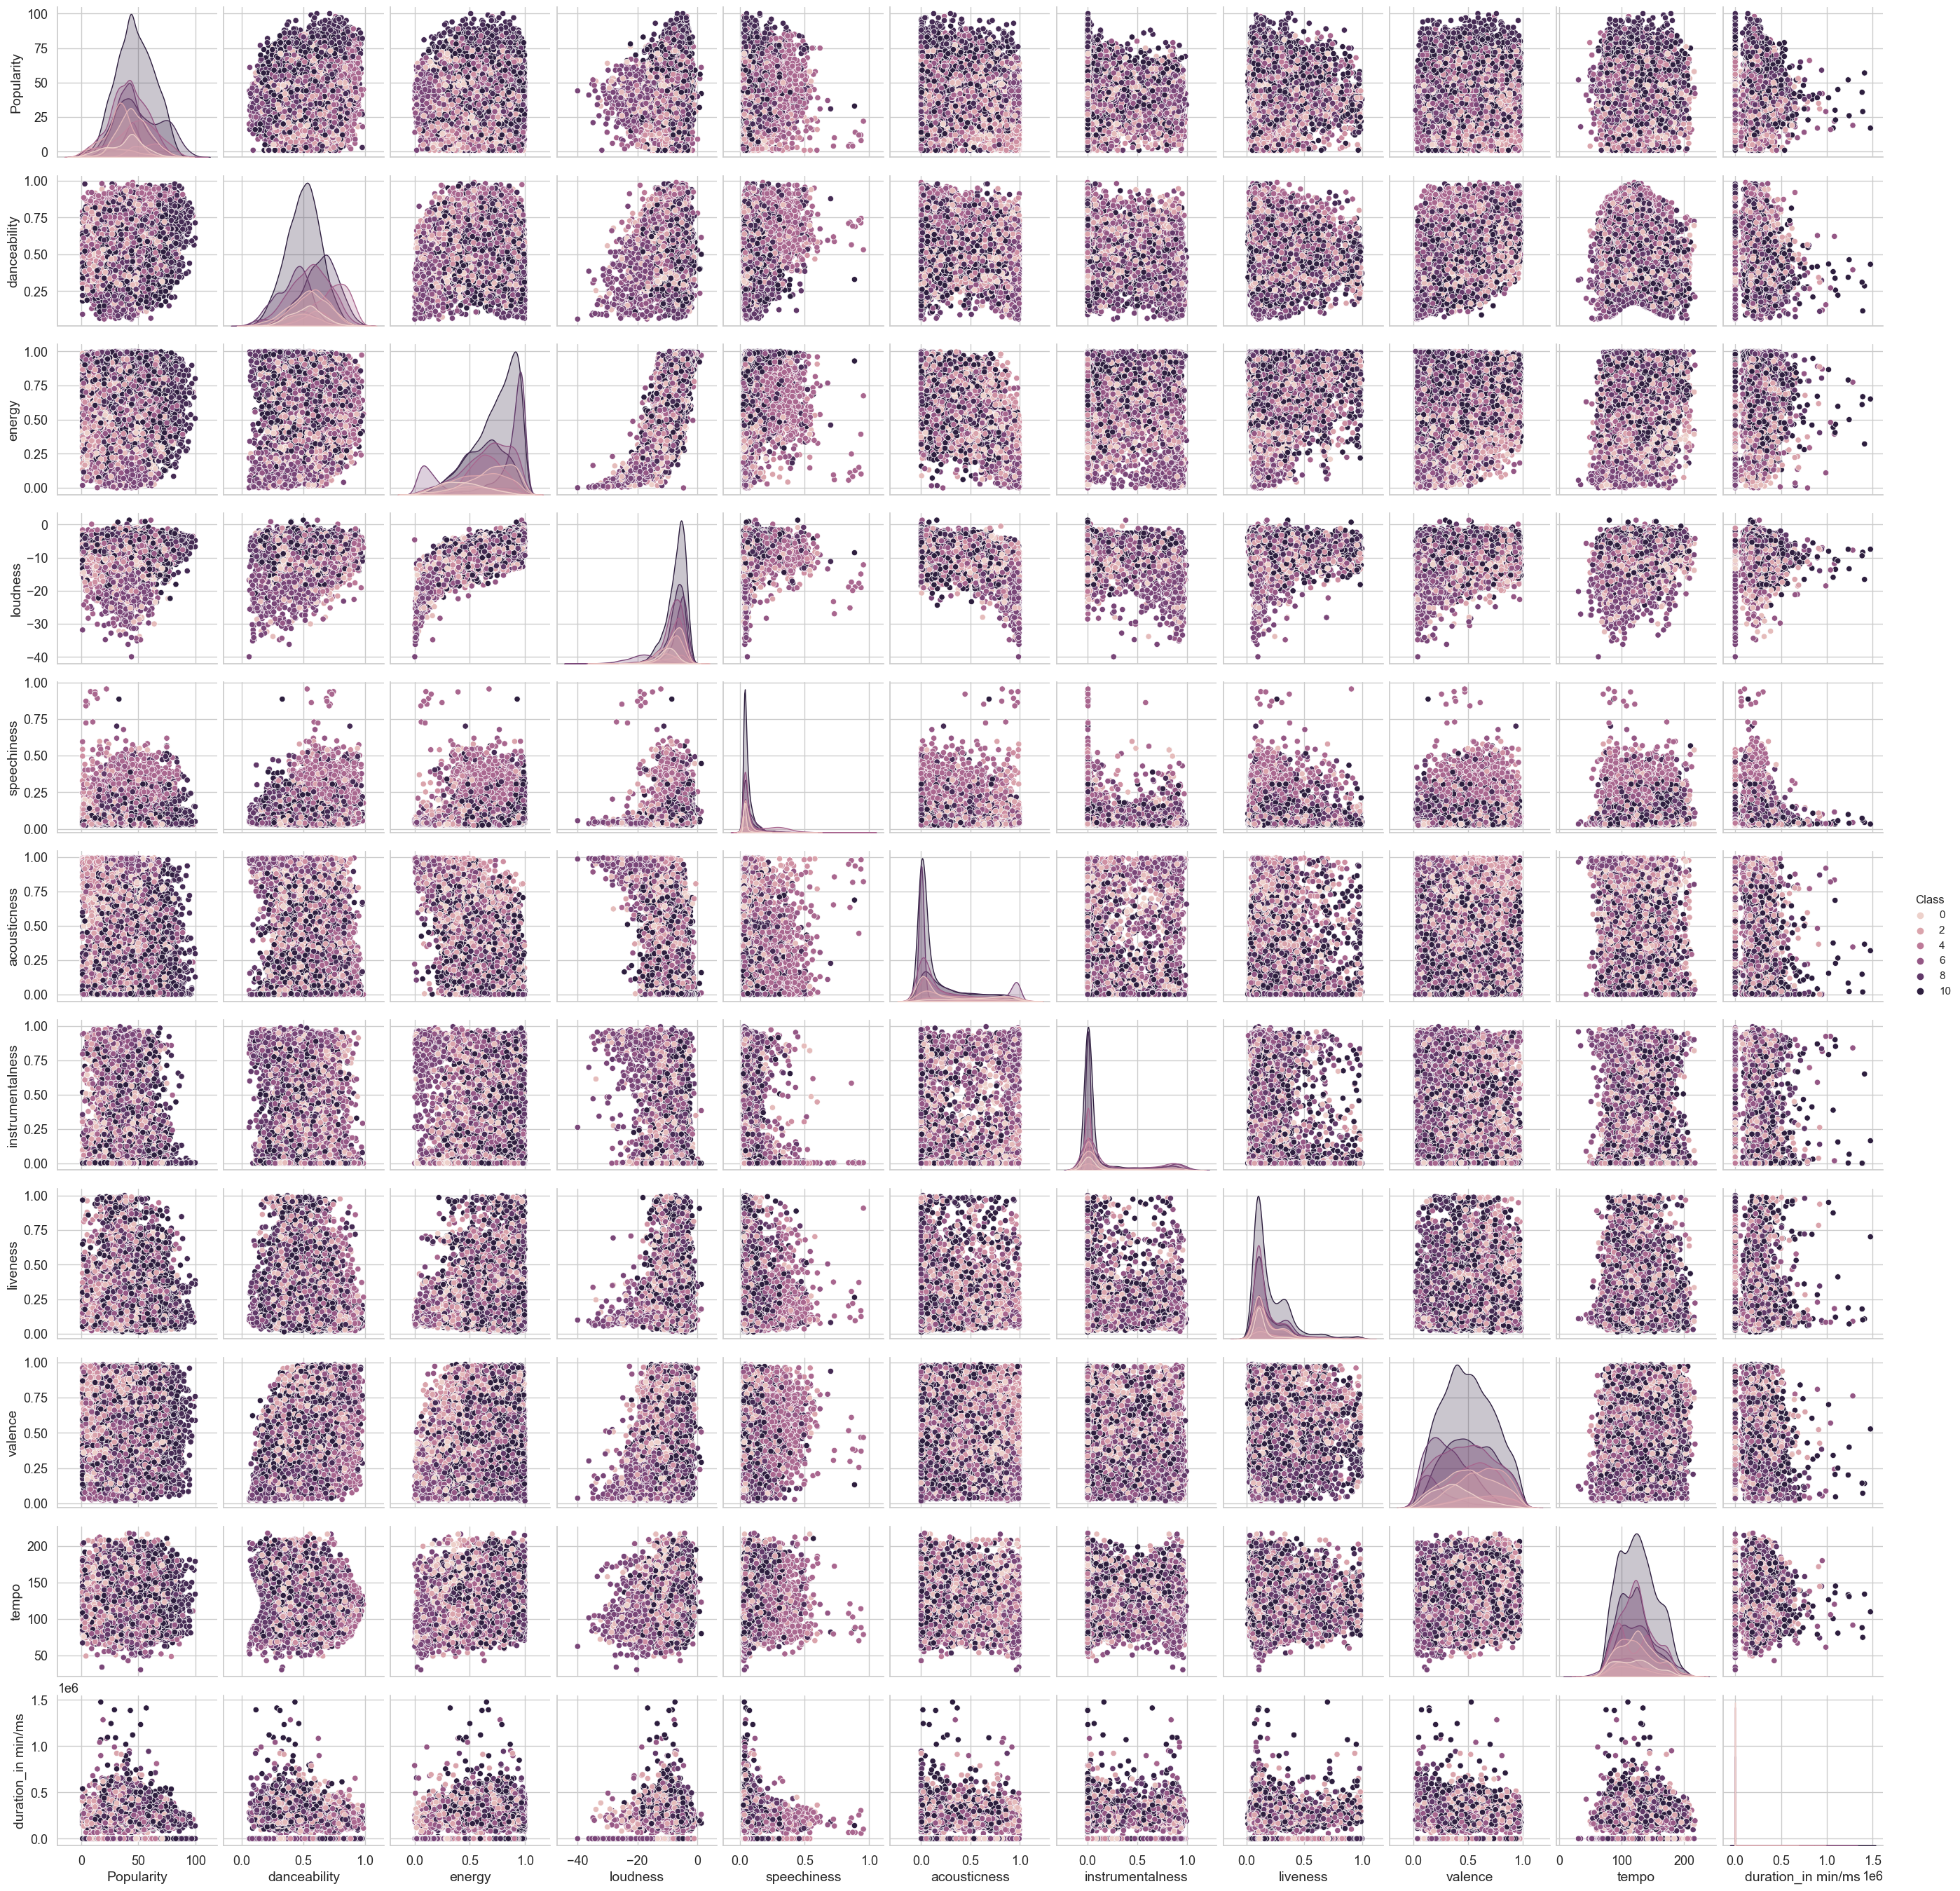

In [26]:
sns.pairplot(df, hue = 'Class')

Визуализация числовых признаков:

---

array([[<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_in min/ms'}>,
        <AxesSubplot:>]], dtype=object)

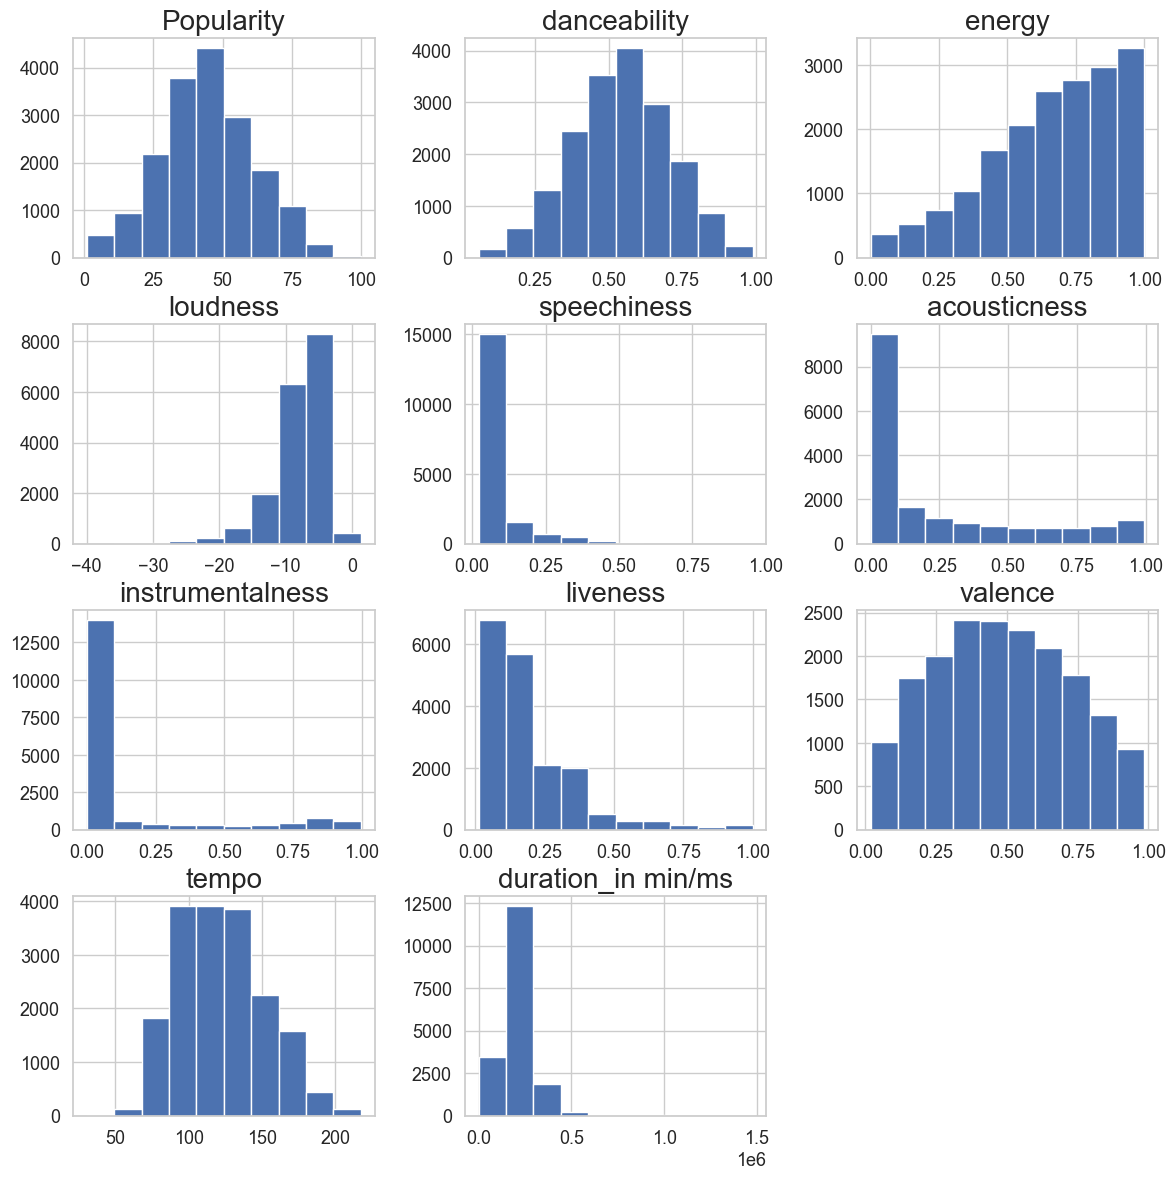

In [27]:
df.hist(column = num_cols, figsize = (14, 14))

Фичи Popularity, danceability, loudness, valence, tempo, duration_in min/ms имеют форму нормального распределения. 

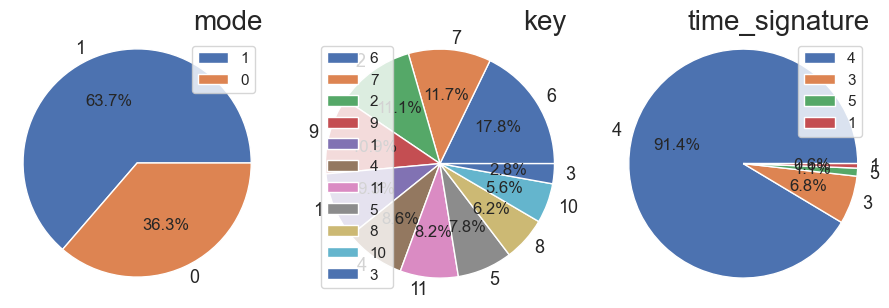

In [28]:
fig = plt.figure(figsize = (15, 15))
for i in range(len(cat_cols)):
    train_counts = df[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i + 1)
    plt.pie(train_counts, labels = train_counts.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(cat_cols[i], loc = "right")
    plt.legend()

90% значений time_signature равны 4, что может плохо сказаться на обучении, может понадобиться удаление колонки

<AxesSubplot:xlabel='instrumentalness'>

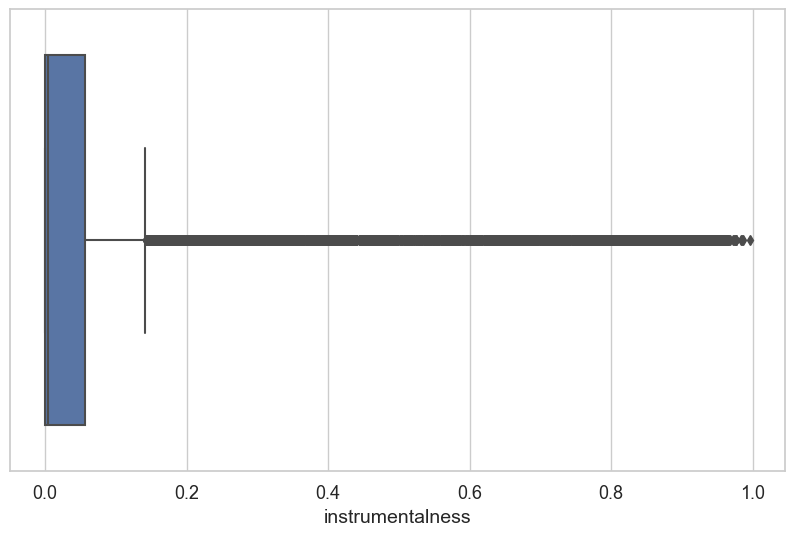

In [29]:
sns.boxplot(df['instrumentalness'])

In [30]:
df.quantile([0.001,0.005,.01,.05,.1,.5,.9,.95,.99,.995,0.999])

Popularity  danceability    energy   loudness  speechiness  \
0.001         1.0      0.082793  0.012299 -30.558745     0.023400   
0.005         2.0      0.122975  0.038997 -25.286825     0.024600   
0.010         4.0      0.153950  0.061395 -22.610850     0.025300   
0.050        16.0      0.261000  0.201750 -15.603750     0.027800   
0.100        23.0      0.326000  0.319000 -12.930000     0.029800   
0.500        44.0      0.545000  0.700000  -7.016000     0.047400   
0.900        68.0      0.762000  0.941500  -3.935000     0.171000   
0.950        74.0      0.818000  0.967000  -3.318000     0.272000   
0.990        84.0      0.905000  0.989000  -2.218000     0.420000   
0.995        87.0      0.929000  0.993000  -1.828850     0.481000   
0.999        95.0      0.962010  0.997000  -1.035950     0.597005   

       acousticness  instrumentalness  liveness   valence       tempo  \
0.001      0.000001          0.000001  0.024999  0.032598   53.902660   
0.005      0.000003          0.000001  0.034495  0.037197   65.806125   
0.010      0.000005          0.000001  0.040500  0.039300   70.965700   
0.050      0.000045          0.000004  0.061200  0.107000   79.529000   
0.100      0.000210          0.000012  0.074400  0.163000   85.374000   
0.500      0.081400          0.003910  0.129000  0.481000  120.065500   
0.900      0.805000          0.704000  0.378000  0.821500  166.107500   
0.950      0.918000          0.862000  0.518000  0.892000  175.705500   
0.990      0.985000          0.934050  0.858050  0.962000  194.000050   
0.995      0.991000          0.946000  0.950000  0.966025  200.317625   
0.999      0.994000          0.964000  0.983000  0.975000  207.920070   

       duration_in min/ms  Class  
0.001            1.703296    0.0  
0.005            2.229320    0.0  
0.010            2.466623    0.0  
0.050            3.384288    1.0  
0.100            4.378108    1.0  
0.500       209160.000000    8.0  
0.900       307247.000000   10.0  
0.950       354629.250000   10.0  
0.990       509169.650000   10.0  
0.995       590764.675000   10.0  
0.999       943562.405000   10.0

Очень сильных выбросов нет

Построим корреляционную матрицу:

---

<AxesSubplot:>

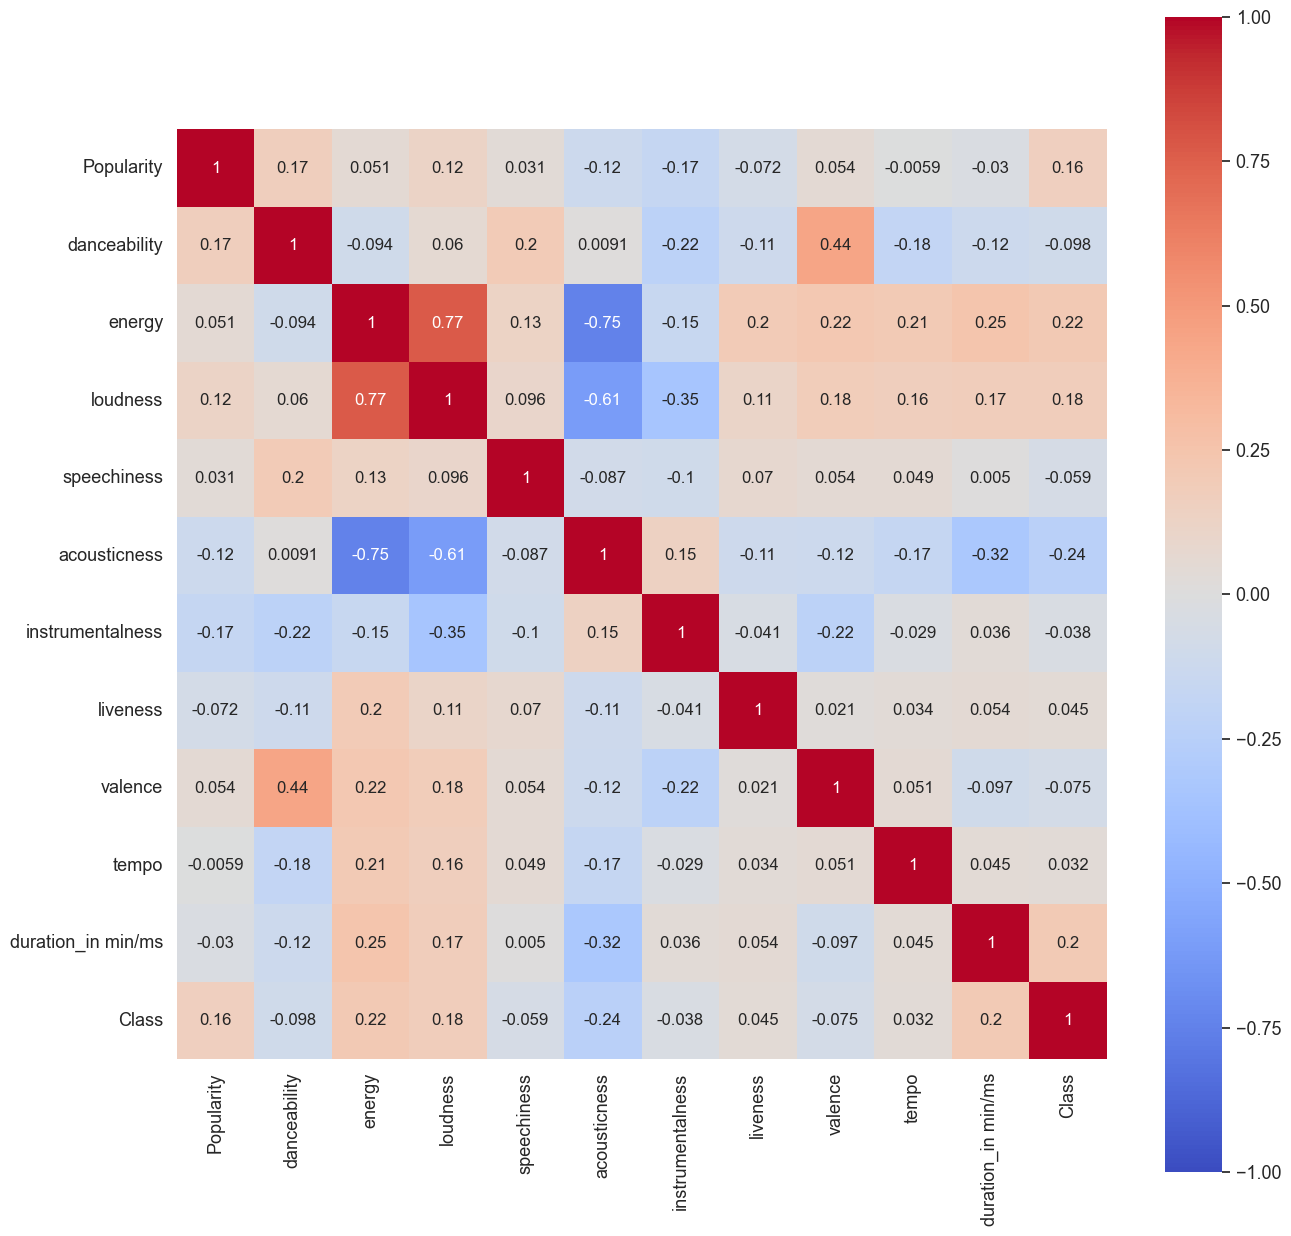

In [31]:
fig, ax = plt.subplots(figsize = (15, 15))

sns.heatmap(df.corr(), square = True, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

## **3. Обучающая и тестовая выборки**


Разделим признаки и целевую переменную:

---

In [32]:
y = df['Class']

Удалим часть признаков:

---

In [33]:
X = df.drop(columns = ['key', 'mode','time_signature', 'Class'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          17996 non-null  float64
 1   danceability        17996 non-null  float64
 2   energy              17996 non-null  float64
 3   loudness            17996 non-null  float64
 4   speechiness         17996 non-null  float64
 5   acousticness        17996 non-null  float64
 6   instrumentalness    17996 non-null  float64
 7   liveness            17996 non-null  float64
 8   valence             17996 non-null  float64
 9   tempo               17996 non-null  float64
 10  duration_in min/ms  17996 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


Разделим датасет на обучающую и тестовую выборки:

---

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 49)

Применим one-hot encoding к категориальным признакам:

---

In [35]:
X_train.shape

(13497, 11)

In [36]:
y_train.size

13497

In [37]:
y_train

14339    2
8761     1
8346     6
10630    9
12274    5
        ..
13196    8
8050     6
7924     2
15861    9
426      2
Name: Class, Length: 13497, dtype: int64

In [38]:
y_test

15271     9
648       2
2364      6
2901     10
6160      9
         ..
5781      1
7423     10
15766     5
13679     3
8474     10
Name: Class, Length: 4499, dtype: int64

Проведем масштабирование количественных признаков:

---

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)

In [40]:
X_train

Popularity  danceability    energy  loudness  speechiness  \
14339   -0.552971     -0.011612 -0.825528  0.116583    -0.377896   
8761    -0.321158      0.072860 -0.512028  0.470784    -0.600702   
8346    -0.031392      0.477121  1.284245  1.176965     3.553557   
10630    0.895860      1.430453  0.356453  0.394513     3.601472   
12274   -0.900690     -1.725197 -0.914495  0.290845    -0.542006   
...           ...           ...       ...       ...          ...   
13196   -0.205251      0.718471  0.733501  0.674172    -0.416228   
8050     0.084515      0.905517  0.716555 -0.009301    -0.413832   
7924    -0.552971     -1.224396 -0.800110  0.204454    -0.544401   
15861    0.722000      0.971888 -0.787400 -0.274890     0.120424   
426     -0.437064      0.670201 -0.058723 -0.193189    -0.537214   

       acousticness  instrumentalness  liveness   valence     tempo  \
14339      2.243235         -0.488021 -0.037602 -0.801488 -1.915086   
8761      -0.784751         -0.427554 -0.428232  0.280312 -0.882050   
8346      -0.795698         -0.490196  1.802141 -0.580967  0.388471   
10630      0.814698         -0.475880 -0.566843  1.549347 -0.909163   
12274      1.164609         -0.475880 -0.762789 -0.888864  1.789818   
...             ...               ...       ...       ...       ...   
13196     -0.787512         -0.488784  2.507796 -0.660022  0.590109   
8050      -0.797245          0.957001  2.879525 -1.600356 -0.697302   
7924       0.448735         -0.490065  0.485339 -1.188440  0.344400   
15861      1.395743         -0.475880 -0.226617  1.129109  0.418292   
426       -0.472591         -0.475880 -0.638669  0.941875  0.102007   

       duration_in min/ms  
14339           -0.118795  
8761            -0.226530  
8346            -0.216717  
10630           -0.395766  
12274           -0.121952  
...                   ...  
13196            0.288015  
8050             0.249261  
7924             0.911987  
15861           -0.005579  
426             -0.375046  

[13497 rows x 11 columns]

Проведем предобработку тестовой выборки:

---

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [43]:
X_test

Popularity  danceability    energy  loudness  speechiness  \
15271   -0.664974      0.923779 -0.516599  0.108290    -0.563994   
648     -0.723435     -0.613460 -1.455300 -1.586288    -0.548489   
2364    -0.723435      0.006202  1.052190  0.937641    -0.616473   
2901     0.387316      0.780780  0.164924  0.519749    -0.559223   
6160    -0.957277      0.024077  0.336376  0.946301     1.099824   
...           ...           ...       ...       ...          ...   
5781     0.971922      1.096569  0.053480  0.846591    -0.602160   
7423    -1.541883     -0.732626  0.627845  0.026642    -0.473349   
15766    1.264224      0.625864 -0.195126 -0.124532     4.308191   
13679   -0.489593      0.268367 -0.700910 -1.278497    -0.369584   
8474    -0.664974     -1.036499  1.017899  0.714716     0.038320   

       acousticness  instrumentalness  liveness   valence     tempo  \
15271     -0.458896         -0.495606 -0.210222  0.567547 -1.441519   
648        0.673406         -0.497505 -0.384497  0.250517  1.244174   
2364      -0.777896         -0.485399 -0.691347 -0.466971  0.254069   
2901       0.819572         -0.499346 -0.769148  0.375661 -0.983966   
6160      -0.076915         -0.485399 -0.710641  0.751090 -1.384527   
...             ...               ...       ...       ...       ...   
5781       0.036770         -0.499326 -0.297359  0.171260 -1.608380   
7423      -0.778526          1.788356  4.825096  0.288060 -0.412902   
15766     -0.076915         -0.485399 -0.471635 -0.884115  0.590017   
13679      1.716059         -0.495428 -0.718733  1.431036  1.428132   
8474      -0.781544          2.816219 -0.822676 -0.800687 -0.149358   

       duration_in min/ms  
15271            0.461045  
648              2.079319  
2364            -0.186692  
2901            -0.381519  
6160             0.009548  
...                   ...  
5781            -0.363264  
7423             1.514745  
15766           -0.097200  
13679           -1.735672  
8474             0.199648  

[4499 rows x 11 columns]

In [44]:
y_test

15271     9
648       2
2364      6
2901     10
6160      9
         ..
5781      1
7423     10
15766     5
13679     3
8474     10
Name: Class, Length: 4499, dtype: int64

## **4. Обучение моделей**

### Обучение 1. K Ближайших Соседей

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Обучаем модель:

---

In [46]:
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Предсказываем:

---

In [47]:
y_train_predict = KNN_model.predict(X_train)
y_test_predict  = KNN_model.predict(X_test)

In [48]:
print('Accuracy of KNN on test set: {:.2f}'.format(KNN_model.score(X_test, y_test)))
print('Accuracy of KNN on train set: {:.2f}'.format(KNN_model.score(X_train, y_train)))

Accuracy of KNN on test set: 0.47
Accuracy of KNN on train set: 0.57


In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62       159
           1       0.15      0.06      0.09       387
           2       0.39      0.29      0.34       314
           3       0.75      0.58      0.65       106
           4       0.48      0.59      0.53        93
           5       0.65      0.69      0.67       375
           6       0.34      0.28      0.31       666
           7       0.90      0.87      0.88       159
           8       0.51      0.53      0.52       450
           9       0.44      0.48      0.46       611
          10       0.44      0.55      0.49      1179

    accuracy                           0.47      4499
   macro avg       0.51      0.51      0.50      4499
weighted avg       0.45      0.47      0.45      4499



In [51]:
from sklearn.metrics import log_loss
log_loss(y_test, KNN_model.predict_proba(X_test))

4.670117423070438

Матрица ошибок:

---

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(10.69430243757872,
 13.730162258279618,
 -0.046567101841183955,
 -0.31536471783250986)

### Обучение 2. Метод опорных векторов

In [53]:
from sklearn.svm import SVC

Обучаем модель:

---

In [54]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)

SVC()

Предсказываем:

---

In [55]:
y_train_pr = SVC_model.predict(X_train)
y_test_pr  = SVC_model.predict(X_test)

In [56]:
print('Accuracy of SVC on test set: {:.2f}'.format(SVC_model.score(X_test, y_test)))
print('Accuracy of SVC on train set: {:.2f}'.format(SVC_model.score(X_train, y_train)))

Accuracy of SVC on test set: 0.52
Accuracy of SVC on train set: 0.56


In [57]:
print(classification_report(y_test, y_test_pr))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69       159
           1       0.55      0.02      0.03       387
           2       0.51      0.26      0.35       314
           3       0.78      0.58      0.67       106
           4       0.56      0.59      0.57        93
           5       0.67      0.71      0.69       375
           6       0.45      0.23      0.31       666
           7       0.92      0.87      0.89       159
           8       0.69      0.43      0.53       450
           9       0.49      0.56      0.52       611
          10       0.43      0.76      0.55      1179

    accuracy                           0.52      4499
   macro avg       0.61      0.53      0.53      4499
weighted avg       0.54      0.52      0.48      4499



Матрица ошибок:

---

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pr)
MSE_test  = mean_squared_error(y_test,  y_test_pr)
R2_train = r2_score(y_train, y_train_pr)
R2_test  = r2_score(y_test,  y_test_pr)

MSE_train, MSE_test, R2_train, R2_test

(11.146254723271838,
 12.9559902200489,
 -0.0907961103781294,
 -0.24119818101630464)

### Обучение 3. Логистическая регрессия

In [59]:
from sklearn.linear_model import LogisticRegression

Обучаем модель:

---

In [60]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Предсказываем:

---

In [61]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.49
Accuracy of logistic regression classifier on train set: 0.50


In [62]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       159
           1       0.00      0.00      0.00       387
           2       0.43      0.29      0.35       314
           3       0.70      0.58      0.64       106
           4       0.42      0.39      0.40        93
           5       0.69      0.64      0.66       375
           6       0.49      0.23      0.31       666
           7       0.92      0.87      0.90       159
           8       0.57      0.53      0.55       450
           9       0.44      0.51      0.47       611
          10       0.42      0.71      0.53      1179

    accuracy                           0.49      4499
   macro avg       0.51      0.50      0.49      4499
weighted avg       0.47      0.49      0.46      4499



In [63]:
log_loss(y_test, logreg.predict_proba(X_test))

1.3597729090672221

Матрица ошибок:

---


In [64]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

(12.794917389049418,
 13.61547010446766,
 -0.25213773299519593,
 -0.3043770827486276)

### Обучение 4. Дерево решений

In [65]:
from sklearn.tree import DecisionTreeClassifier

Обучаем модель:

---

In [66]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Предсказываем:

---

In [67]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(model.score(X_train, y_train)))

Accuracy of decision tree classifier on test set: 0.43
Accuracy of decision tree classifier on train set: 0.47


In [68]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.49      0.75      0.60       159
           1       0.00      0.00      0.00       387
           2       0.00      0.00      0.00       314
           3       0.69      0.35      0.46       106
           4       0.46      0.67      0.55        93
           5       0.71      0.64      0.67       375
           6       0.33      0.29      0.31       666
           7       0.90      0.86      0.88       159
           8       0.71      0.18      0.29       450
           9       0.42      0.37      0.39       611
          10       0.37      0.73      0.49      1179

    accuracy                           0.43      4499
   macro avg       0.46      0.44      0.42      4499
weighted avg       0.41      0.43      0.39      4499



In [69]:
log_loss(y_test, model.predict_proba(X_test))

1.587694556678709

Матрица ошибок:

---

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

(12.918722679113877,
 13.989553234052012,
 -0.2642535810714641,
 -0.34021465996989475)

### Обучение 5. Линейная регрессия

In [71]:
from sklearn.linear_model import LinearRegression

Обучаем модель:

---


In [72]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Предсказываем:

---

In [73]:
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))
print('Accuracy of linear regression classifier on train set: {:.2f}'.format(linreg.score(X_train, y_train)))

Accuracy of linear regression classifier on test set: 0.10
Accuracy of linear regression classifier on train set: 0.12


Матрица ошибок:

---

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

(8.959289672147683,
 9.344206332976176,
 0.12322492453671707,
 0.10481470682313554)

### Обучение 6. Случайный лес

In [75]:
from sklearn.ensemble import RandomForestClassifier

Обучаем модель:

---

In [76]:
rfc = RandomForestClassifier(max_depth = 9, random_state = 3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=3)

Предсказываем:

---

In [77]:
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rfc.score(X_train, y_train)))

Accuracy of random forest classifier on test set: 0.49
Accuracy of random forest classifier on train set: 0.61


In [78]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.67       159
           1       0.75      0.01      0.02       387
           2       0.76      0.14      0.24       314
           3       0.63      0.65      0.64       106
           4       0.77      0.11      0.19        93
           5       0.71      0.70      0.70       375
           6       0.46      0.30      0.36       666
           7       0.95      0.91      0.93       159
           8       0.83      0.24      0.38       450
           9       0.50      0.44      0.47       611
          10       0.40      0.83      0.54      1179

    accuracy                           0.49      4499
   macro avg       0.67      0.47      0.47      4499
weighted avg       0.58      0.49      0.45      4499



In [79]:
log_loss(y_test, rfc.predict_proba(X_test))

1.3711579192182437

Матрица ошибок:

---

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

(10.48796028747129,
 13.373638586352524,
 -0.02637402171407044,
 -0.28120935606013164)

### Обучение 7. Ансамбль моделей



In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

Обучаем модель:

---

In [82]:
mod1 = GradientBoostingClassifier(warm_start = True, n_estimators = 333, learning_rate = 0.9, max_depth = 5, random_state = 7)
mod2 = RandomForestClassifier(max_depth = 8, random_state = 3)
mod3 = ExtraTreesClassifier(n_estimators = 10, max_depth = 5, random_state = 3)
mod4 = HistGradientBoostingClassifier(max_iter = 10, max_depth = 5)

In [83]:
ereg = VotingClassifier(estimators=[('gb', mod1), ('rf', mod2), ('et', mod3), ('hgb', mod4)])

In [84]:
ereg.fit(X_train, y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         max_depth=5,
                                                         n_estimators=333,
                                                         random_state=7,
                                                         warm_start=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     random_state=3)),
                             ('et',
                              ExtraTreesClassifier(max_depth=5, n_estimators=10,
                                                   random_state=3)),
                             ('hgb',
                              HistGradientBoostingClassifier(max_depth=5,
                                                             max_iter=10))])

Предсказываем:

---

In [ ]:
y_test_pred = ereg.predict(X_test)
y_train_pred = ereg.predict(X_train)
print('Accuracy of voting classifier on test set: {:.2f}'.format(ereg.score(X_test, y_test)))
print('Accuracy of voting classifier on train set: {:.2f}'.format(ereg.score(X_train, y_train)))

In [ ]:
print(classification_report(y_test, y_test_pred))

Матрица ошибок:

---

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test  = mean_squared_error(y_test,  y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
R2_test  = r2_score(y_test,  y_test_pred)

MSE_train, MSE_test, R2_train, R2_test

## **5. Итог**

Сравнение моделей:

|  Поз. |  Модель | MSE_test |
| :-: | :-: | :-: |
| 1. | K Ближайших Соседей | 13.68 |
| 2. | Метод опорных векторов | 12.96 |
| 3. | Логистическая регрессия | 13.62 |
| 4. | Дерево решений | 13.99 |
| 5. | **Линейная регрессия** | **9.34** |
| 6. | Случайный лес | 13.37 |
| 7. | Ансамбль моделей | 15.21 |